In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = '/content/drive/MyDrive/df.csv'
df = pd.read_csv(df)

In [ ]:
df=df.drop(' Bwd PSH Flags',axis=1)
df=df.drop(' Fwd URG Flags',axis=1)
df=df.drop(' Bwd URG Flags',axis=1)
df=df.drop('FIN Flag Count',axis=1)
df=df.drop(' PSH Flag Count',axis=1)
df=df.drop(' ECE Flag Count',axis=1)
df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
df=df.drop(' Fwd Avg Packets/Bulk',axis=1)
df=df.drop(' Fwd Avg Bulk Rate',axis=1)
df=df.drop(' Bwd Avg Bytes/Bulk',axis=1)
df=df.drop(' Bwd Avg Packets/Bulk',axis=1)
df=df.drop('Bwd Avg Bulk Rate',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Unnamed: 0.1',axis=1)
df=df.drop('SimillarHTTP', axis=1)
df=df.drop('Flow ID', axis=1)
df=df.drop('Unnamed: 0.1.1.1', axis=1)
df=df.drop(' Timestamp', axis=1)
df=df.drop(' Destination IP', axis=1)
df=df.drop(' Source IP', axis=1)
df=df.drop(' Source Port', axis=1)
df=df.drop(' Destination Port', axis=1)
df=df.drop(' Protocol', axis=1)

In [ ]:
df_save = df.copy()

In [ ]:
df = df.rename(columns={" Label": "Label"})
df.Label.unique()

array(['Syn', 'BENIGN', 'UDP', 'UDPLag'], dtype=object)

In [ ]:
df['Label'] = df['Label'].replace('BENIGN', 0)
df['Label'] = df['Label'].replace('Syn', 1)
df['Label'] = df['Label'].replace('UDP', 2)
df['Label'] = df['Label'].replace('UDPLag', 3)

In [ ]:
df.head()

,Unnamed: 0.1.1,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,445444,36063894,7,2,42.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.497342e+00,2.495571e-01,4.507987e+06,7.062714e+06,18628035.0,1.0,36063894.0,6.010649e+06,7.680923e+06,18628035.0,1.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,0,140,40,1.940999e-01,0.055457,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.666667,6.0,6.0,140,7,42,2,12,5840,0,6,20,18.0,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,1,1
1,113842,44851366,8,4,48.0,24.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.605302e+00,2.675504e-01,4.077397e+06,9.056967e+06,28934293.0,1.0,44851314.0,6.407331e+06,1.092235e+07,28934293.0,1.0,3525902.0,1.175301e+06,2.035679e+06,3525900.0,1.0,0,160,80,1.783669e-01,0.089183,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.500000,6.0,6.0,160,8,48,4,24,5840,0,7,20,1.0,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,1,1
2,176377,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,2.000000e+06,0.000000,6.0,6.0,6.0,0.0,0.0,1,0,0,1,0,0.0,9.000000,6.0,0.0,40,2,12,0,0,0,-1,1,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
3,24777,0,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,0.000000e+00,0.000000,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,9.000000,6.0,0.0,40,2,12,0,0,5840,-1,1,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
4,85100,35731470,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.679192e+00,2.798653e-01,3.970163e+06,6.026604e+06,13693985.0,0.0,35731470.0,5.104496e+06,6.455349e+06,13693985.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0,160,40,2.238923e-01,0.055973,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.600000,6.0,6.0,160,8,48,2,12,5840,0,7,20,24.5,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,1,1


In [ ]:
df_save.head()

,Unnamed: 0.1.1,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,445444,36063894,7,2,42.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.497342e+00,2.495571e-01,4.507987e+06,7.062714e+06,18628035.0,1.0,36063894.0,6.010649e+06,7.680923e+06,18628035.0,1.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,0,140,40,1.940999e-01,0.055457,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.666667,6.0,6.0,140,7,42,2,12,5840,0,6,20,18.0,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,1,Syn
1,113842,44851366,8,4,48.0,24.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.605302e+00,2.675504e-01,4.077397e+06,9.056967e+06,28934293.0,1.0,44851314.0,6.407331e+06,1.092235e+07,28934293.0,1.0,3525902.0,1.175301e+06,2.035679e+06,3525900.0,1.0,0,160,80,1.783669e-01,0.089183,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.500000,6.0,6.0,160,8,48,4,24,5840,0,7,20,1.0,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,1,Syn
2,176377,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,2.000000e+06,0.000000,6.0,6.0,6.0,0.0,0.0,1,0,0,1,0,0.0,9.000000,6.0,0.0,40,2,12,0,0,0,-1,1,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,Syn
3,24777,0,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,inf,inf,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,0.000000e+00,0.000000,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,9.000000,6.0,0.0,40,2,12,0,0,5840,-1,1,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,Syn
4,85100,35731470,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.679192e+00,2.798653e-01,3.970163e+06,6.026604e+06,13693985.0,0.0,35731470.0,5.104496e+06,6.455349e+06,13693985.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0,160,40,2.238923e-01,0.055973,6.0,6.0,6.0,0.0,0.0,0,0,1,0,0,0.0,6.600000,6.0,6.0,160,8,48,2,12,5840,0,7,20,24.5,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,1,Syn


In [ ]:
df.Label.value_counts()

1    1301400
2     837640
0      77574
3       1873
Name: Label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218487 entries, 0 to 2218486
Data columns (total 68 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0.1.1                int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

### **데이터 column 추출**

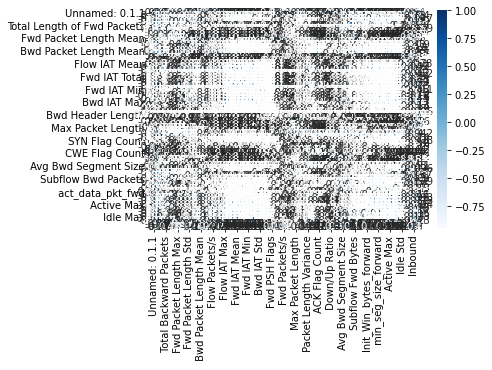

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
cor = df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
cor[" Flow Duration"].sort_values(ascending=False)

 Flow Duration            1.000000
Fwd IAT Total             0.999777
 Idle Max                 0.912455
 Flow IAT Max             0.912294
 Fwd IAT Max              0.912272
                            ...   
 Fwd Packet Length Min   -0.228811
 Min Packet Length       -0.228982
Fwd Packets/s            -0.229641
Label                    -0.242163
 Flow Packets/s          -0.249061
Name:  Flow Duration, Length: 68, dtype: float64

In [ ]:
cor[" Bwd Packet Length Std"].sort_values(ascending=False)

 Bwd Packet Length Std     1.000000
Bwd Packet Length Max      0.968933
 Packet Length Std         0.900648
 Avg Bwd Segment Size      0.863358
 Bwd Packet Length Mean    0.863358
                             ...   
 Min Packet Length        -0.056721
 Flow Packets/s           -0.058010
Unnamed: 0.1.1            -0.101057
Label                     -0.167929
 Inbound                  -0.389904
Name:  Bwd Packet Length Std, Length: 68, dtype: float64

In [ ]:
cor[" Average Packet Size"].sort_values(ascending=False)

 Average Packet Size       1.000000
 Packet Length Mean        0.989523
 Min Packet Length         0.986226
 Fwd Packet Length Min     0.985933
 Fwd Packet Length Mean    0.983855
                             ...   
 Flow IAT Std             -0.220970
 Fwd IAT Mean             -0.229191
 Down/Up Ratio            -0.348764
Init_Win_bytes_forward    -0.752468
 ACK Flag Count           -0.918910
Name:  Average Packet Size, Length: 68, dtype: float64

In [ ]:
 cor[" Flow IAT Std"].sort_values(ascending=False)

 Flow IAT Std             1.000000
 Fwd IAT Std              0.994124
 Fwd IAT Mean             0.978718
 Flow IAT Mean            0.966856
 Flow IAT Max             0.949125
                            ...   
 Avg Fwd Segment Size    -0.224290
 Fwd Packet Length Min   -0.228832
 Min Packet Length       -0.228998
Fwd Packets/s            -0.234872
 Flow Packets/s          -0.254762
Name:  Flow IAT Std, Length: 68, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [" Flow Duration", " Bwd Packet Length Std", " Average Packet Size"," Flow IAT Std"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
ddos = df.loc[:, [' Flow IAT Std',
                  ' Flow IAT Mean',
                  ' Flow IAT Min',
                  ' Flow IAT Max',
                  ' Fwd IAT Std',
                  ' Fwd IAT Mean',
                  ' Fwd IAT Max',
                  ' Packet Length Mean',
                  ' Packet Length Std',
                  ' Average Packet Size',
                  ' Min Packet Length',
                  ' Fwd Packet Length Min',
                  ' Fwd Packet Length Mean',
                  ' Bwd Packet Length Std',
                  'Bwd Packet Length Max',
                  ' Bwd Packet Length Mean',
                  ' Avg Bwd Segment Size',
                  ' Flow Duration',
                  'Label']]
ddos.head(10)

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration,Label
0,7.062714e+06,4.507987e+06,1.0,18628035.0,7.680923e+06,6.010649e+06,18628035.0,6.0,0.0,6.666667,6.0,6.0,6.0,0.0,6.0,6.0,6.0,36063894,1
1,9.056967e+06,4.077397e+06,1.0,28934293.0,1.092235e+07,6.407331e+06,28934293.0,6.0,0.0,6.500000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,44851366,1
2,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1,1
3,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0,1
4,6.026604e+06,3.970163e+06,0.0,13693985.0,6.455349e+06,5.104496e+06,13693985.0,6.0,0.0,6.600000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,35731470,1
5,5.658033e+01,3.366667e+01,1.0,99.0,0.000000e+00,1.000000e+00,1.0,6.0,0.0,7.500000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,101,1
6,2.861818e+01,3.400000e+01,1.0,52.0,0.000000e+00,4.900000e+01,49.0,6.0,0.0,7.500000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,102,1
7,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1,1
8,2.081666e+00,5.033333e+01,48.0,52.0,0.000000e+00,5.100000e+01,51.0,6.0,0.0,7.500000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,151,1
9,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1,1


### **Missing value 처리**

In [ ]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(ddos.values)
imputed_data = imr.transform(ddos.values)

In [ ]:
ddos.dropna()

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration,Label
0,7.062714e+06,4.507987e+06,1.0,18628035.0,7.680923e+06,6.010649e+06,18628035.0,6.0,0.0,6.666667,6.0,6.0,6.0,0.0,6.0,6.0,6.0,36063894,1
1,9.056967e+06,4.077397e+06,1.0,28934293.0,1.092235e+07,6.407331e+06,28934293.0,6.0,0.0,6.500000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,44851366,1
2,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1,1
3,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,6.0,0.0,9.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0,1
4,6.026604e+06,3.970163e+06,0.0,13693985.0,6.455349e+06,5.104496e+06,13693985.0,6.0,0.0,6.600000,6.0,6.0,6.0,0.0,6.0,6.0,6.0,35731470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218482,3.747666e+01,2.650000e+01,0.0,53.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,0
2218483,4.525483e+01,3.300000e+01,1.0,65.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0
2218484,1.513670e+04,8.762667e+03,1.0,26241.0,0.000000e+00,4.600000e+01,46.0,48.0,0.0,60.000000,48.0,48.0,48.0,0.0,48.0,48.0,48.0,26288,0
2218485,0.000000e+00,3.067900e+04,30679.0,30679.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30679,0


### **Train set과 Test set split**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ddos, ddos["Label"]):
    ddos_train_set = ddos.loc[train_index]
    ddos_test_set = ddos.loc[test_index]

In [ ]:
ddos_train_set["Label"].value_counts() / len(ddos_train_set)

1    0.586616
2    0.377573
0    0.034967
3    0.000844
Name: Label, dtype: float64

In [ ]:
ddos_train_set["Label"].value_counts() 

1    1041120
2     670112
0      62059
3       1498
Name: Label, dtype: int64

In [ ]:
ddos_test_set["Label"].value_counts() / len(ddos_test_set)

1    0.586615
2    0.377572
0    0.034967
3    0.000845
Name: Label, dtype: float64

In [ ]:
ddos_test_set["Label"].value_counts()

1    260280
2    167528
0     15515
3       375
Name: Label, dtype: int64

### **Train set 처리**

In [ ]:
ddos_train_labels = ddos_train_set["Label"].copy()
ddos_train = ddos_train_set.drop("Label", axis=1) # drop labels for training set

In [ ]:
ddos_train_labels = pd.DataFrame(ddos_train_labels)
ddos_train_labels['Label'] = ddos_train_labels['Label'].replace(0, 'BENIGN')
ddos_train_labels['Label'] = ddos_train_labels['Label'].replace(1, 'Syn')
ddos_train_labels['Label'] = ddos_train_labels['Label'].replace(2, 'UDP')
ddos_train_labels['Label'] = ddos_train_labels['Label'].replace(3, 'UDPLag')
ddos_train_labels.head()

,Label
2116146,Syn
772963,UDP
138832,Syn
1432752,UDP
1764447,Syn


In [ ]:
ddos_train.head()

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration
2116146,4.135618e+01,2.633333e+01,0.0,74.0,0.000000e+00,7.400000e+01,74.0,6.0,0.000000,7.50,6.0,6.0,6.0,0.0,6.0,6.0,6.0,79
772963,6.230418e+04,3.597233e+04,1.0,107915.0,6.230418e+04,3.597233e+04,107915.0,353.6,32.315631,442.00,330.0,330.0,359.5,0.0,0.0,0.0,0.0,107917
138832,7.306527e+06,4.126471e+06,1.0,17784026.0,8.255839e+06,5.777059e+06,17784026.0,6.0,0.000000,6.75,6.0,6.0,6.0,0.0,6.0,6.0,6.0,28885294
1432752,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,383.0,0.000000,574.50,383.0,383.0,383.0,0.0,0.0,0.0,0.0,1
1764447,0.000000e+00,1.000000e+00,1.0,1.0,0.000000e+00,1.000000e+00,1.0,6.0,0.000000,9.00,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1


**One hot 인코딩**

In [ ]:
ddos_train_labels = pd.get_dummies(ddos_train_labels[['Label']])

In [ ]:
ddos_train_labels.head()

,Label_BENIGN,Label_Syn,Label_UDP,Label_UDPLag
2116146,0,1,0,0
772963,0,0,1,0
138832,0,1,0,0
1432752,0,0,1,0
1764447,0,1,0,0


In [ ]:
print(ddos_train_labels['Label_BENIGN'].sum())
print(ddos_train_labels['Label_Syn'].sum())
print(ddos_train_labels['Label_UDP'].sum())
print(ddos_train_labels['Label_UDPLag'].sum())

62059
1041120
670112
1498


**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
ddos_train_sc = stds.fit_transform(ddos_train)

In [ ]:
ddos_train = pd.DataFrame(ddos_train_sc, index = ddos_train.index, columns=ddos_train.columns)
ddos_train.head()

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration
2116146,-0.306231,-0.298610,-0.008099,-0.296523,-0.305430,-0.309428,-0.295700,-0.789456,-0.204042,-0.777282,-0.777553,-0.777137,-0.786597,-0.069896,-0.046098,0.015738,0.015738,-0.299533
772963,-0.278886,-0.272302,-0.008093,-0.279570,-0.280968,-0.289112,-0.278742,1.160697,0.530260,0.984192,1.098242,1.096737,1.195227,-0.069896,-0.084646,-0.108524,-0.108524,-0.292657
138832,2.902671,2.721360,-0.008093,2.499281,2.936045,2.960004,2.500823,-0.789456,-0.204042,-0.780322,-0.777553,-0.777137,-0.786597,-0.069896,-0.046098,0.015738,0.015738,1.542442
1432752,-0.306249,-0.298628,-0.008093,-0.296535,-0.305430,-0.309469,-0.295711,1.325641,-0.204042,1.521351,1.405085,1.403266,1.326975,-0.069896,-0.084646,-0.108524,-0.108524,-0.299538
1764447,-0.306249,-0.298628,-0.008093,-0.296535,-0.305430,-0.309469,-0.295711,-0.789456,-0.204042,-0.771201,-0.777553,-0.777137,-0.786597,-0.069896,-0.084646,-0.108524,-0.108524,-0.299538


## **Test set 처리**

In [ ]:
ddos_test_labels = ddos_test_set["Label"].copy()
ddos_test = ddos_test_set.drop("Label", axis=1) # drop labels for training set

In [ ]:
ddos_test_labels = pd.DataFrame(ddos_test_labels)
ddos_test_labels['Label'] = ddos_test_labels['Label'].replace(0, 'BENIGN')
ddos_test_labels['Label'] = ddos_test_labels['Label'].replace(1, 'Syn')
ddos_test_labels['Label'] = ddos_test_labels['Label'].replace(2, 'UDP')
ddos_test_labels['Label'] = ddos_test_labels['Label'].replace(3, 'UDPLag')
ddos_test_labels.head()

,Label
482221,BENIGN
232502,Syn
872460,UDP
372664,Syn
1136522,UDP


In [ ]:
ddos_test.head()

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration
482221,101.823376,74.000000,2.0,146.0,0.0,0.0,0.0,6.0,0.0,8.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,148
232502,26.558112,16.333333,1.0,47.0,0.0,1.0,1.0,6.0,0.0,7.5,6.0,6.0,6.0,0.0,6.0,6.0,6.0,49
872460,0.000000,1.000000,1.0,1.0,0.0,1.0,1.0,375.0,0.0,562.5,375.0,375.0,375.0,0.0,0.0,0.0,0.0,1
372664,0.000000,1.000000,1.0,1.0,0.0,1.0,1.0,6.0,0.0,9.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1
1136522,0.000000,1.000000,1.0,1.0,0.0,1.0,1.0,383.0,0.0,574.5,383.0,383.0,383.0,0.0,0.0,0.0,0.0,1


**One hot 인코딩**

In [ ]:
ddos_test_labels = pd.get_dummies(ddos_test_labels[['Label']])

In [ ]:
ddos_test_labels.head()

,Label_BENIGN,Label_Syn,Label_UDP,Label_UDPLag
482221,1,0,0,0
232502,0,1,0,0
872460,0,0,1,0
372664,0,1,0,0
1136522,0,0,1,0


In [ ]:
print(ddos_test_labels['Label_BENIGN'].sum())
print(ddos_test_labels['Label_Syn'].sum())
print(ddos_test_labels['Label_UDP'].sum())
print(ddos_test_labels['Label_UDPLag'].sum())

15515
260280
167528
375


**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
ddos_test_sc = stds.fit_transform(ddos_test)

In [ ]:
ddos_test = pd.DataFrame(ddos_test_sc, index = ddos_test.index, columns=ddos_test.columns)
ddos_test.head()

,Flow IAT Std,Flow IAT Mean,Flow IAT Min,Flow IAT Max,Fwd IAT Std,Fwd IAT Mean,Fwd IAT Max,Packet Length Mean,Packet Length Std,Average Packet Size,Min Packet Length,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Flow Duration
482221,-0.306290,-0.298046,-0.008716,-0.295875,-0.305263,-0.308980,-0.295063,-0.789371,-0.203555,-0.775256,-0.777541,-0.776828,-0.786349,-0.070041,-0.045971,0.015066,0.015066,-0.299069
232502,-0.306323,-0.298088,-0.008721,-0.295890,-0.305263,-0.308979,-0.295062,-0.789371,-0.203555,-0.777284,-0.777541,-0.776828,-0.786349,-0.070041,-0.045971,0.015066,0.015066,-0.299075
872460,-0.306334,-0.298099,-0.008721,-0.295897,-0.305263,-0.308979,-0.295062,1.280703,-0.203555,1.473237,1.359377,1.356830,1.281789,-0.070041,-0.084685,-0.107940,-0.107940,-0.299079
372664,-0.306334,-0.298099,-0.008721,-0.295897,-0.305263,-0.308979,-0.295062,-0.789371,-0.203555,-0.771201,-0.777541,-0.776828,-0.786349,-0.070041,-0.084685,-0.107940,-0.107940,-0.299079
1136522,-0.306334,-0.298099,-0.008721,-0.295897,-0.305263,-0.308979,-0.295062,1.325583,-0.203555,1.521897,1.405706,1.403088,1.326627,-0.070041,-0.084685,-0.107940,-0.107940,-0.299079


# **Classification**

### **MLP**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

param_grid = [
    {'hidden_layer_sizes': [(10, 10), (15, 15), (20, 20)], 'max_iter': [20]},
  ]

MLPC = MLPClassifier(random_state=42)
grid_search = GridSearchCV(MLPC, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(ddos_train, ddos_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{

In [ ]:
grid_search.best_params_

{'hidden_layer_sizes': (20, 20), 'max_iter': 20}

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.06634599415357374 {'hidden_layer_sizes': (10, 10), 'max_iter': 20}
0.0655267106691397 {'hidden_layer_sizes': (15, 15), 'max_iter': 20}
0.06540298728978233 {'hidden_layer_sizes': (20, 20), 'max_iter': 20}


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,84.339501,2.494334,0.193708,0.025271,"(10, 10)",20,"{'hidden_layer_sizes': (10, 10), 'max_iter': 20}",-0.004184,-0.004479,-0.004336,-0.004466,-0.004543,-0.004402,0.000128,3,-0.004239,-0.004432,-0.004350,-0.004397,-0.004557,-0.004395,0.000104
1,91.812265,1.056126,0.219555,0.017496,"(15, 15)",20,"{'hidden_layer_sizes': (15, 15), 'max_iter': 20}",-0.004223,-0.004048,-0.004525,-0.004446,-0.004227,-0.004294,0.000171,2,-0.004261,-0.004007,-0.004510,-0.004357,-0.004202,-0.004267,0.000167
2,98.870738,5.409157,0.298607,0.063478,"(20, 20)",20,"{'hidden_layer_sizes': (20, 20), 'max_iter': 20}",-0.004144,-0.004182,-0.004293,-0.004479,-0.004289,-0.004278,0.000117,1,-0.004197,-0.004094,-0.004286,-0.004370,-0.004240,-0.004237,0.000092


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

param_grid = [
    {'hidden_layer_sizes': [(10, 10), (15, 15), (20, 20)], 'max_iter': [20]}
  ]

MLPC = MLPClassifier(random_state=42)
grid_search = GridSearchCV(MLPC, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(ddos_train, ddos_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{

In [ ]:
grid_search.best_params_

{'hidden_layer_sizes': (20, 20), 'max_iter': 20}

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.06634599415357374 {'hidden_layer_sizes': (10, 10), 'max_iter': 20}
0.0655267106691397 {'hidden_layer_sizes': (15, 15), 'max_iter': 20}
0.06540298728978233 {'hidden_layer_sizes': (20, 20), 'max_iter': 20}


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,85.215087,2.907607,0.195017,0.021644,"(10, 10)",20,"{'hidden_layer_sizes': (10, 10), 'max_iter': 20}",-0.004184,-0.004479,-0.004336,-0.004466,-0.004543,-0.004402,0.000128,3,-0.004239,-0.004432,-0.004350,-0.004397,-0.004557,-0.004395,0.000104
1,92.461856,1.491793,0.227581,0.018237,"(15, 15)",20,"{'hidden_layer_sizes': (15, 15), 'max_iter': 20}",-0.004223,-0.004048,-0.004525,-0.004446,-0.004227,-0.004294,0.000171,2,-0.004261,-0.004007,-0.004510,-0.004357,-0.004202,-0.004267,0.000167
2,102.141084,3.790737,0.310633,0.040774,"(20, 20)",20,"{'hidden_layer_sizes': (20, 20), 'max_iter': 20}",-0.004144,-0.004182,-0.004293,-0.004479,-0.004289,-0.004278,0.000117,1,-0.004197,-0.004094,-0.004286,-0.004370,-0.004240,-0.004237,0.000092


### **RamdomForest**

# **Evaluate**

In [ ]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(ddos_test)

final_mse = mean_squared_error(ddos_test_labels, final_predictions)
final_result = np.sqrt(final_mse)

In [ ]:
print(final_result)

0.06369754205967318


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

param_grid = [
    {'hidden_layer_sizes': [(10, 10), (15, 15), (20, 20)], 'max_iter': [20]}
  ]

MLPC = MLPClassifier(random_state=42)
grid_search = GridSearchCV(MLPC, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(ddos_train, ddos_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{

In [ ]:
grid_search.best_params_

{'hidden_layer_sizes': (20, 20), 'max_iter': 20}

In [ ]:
grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,87.753286,2.561415,0.306573,0.022467,"(10, 10)",20,"{'hidden_layer_sizes': (10, 10), 'max_iter': 20}",0.991599,0.990912,0.991255,0.990965,0.990886,0.991123,0.000272,3,0.991491,0.991005,0.991253,0.991101,0.990854,0.991141,0.000218
1,93.954698,1.021660,0.318496,0.008517,"(15, 15)",20,"{'hidden_layer_sizes': (15, 15), 'max_iter': 20}",0.991526,0.991619,0.990855,0.991030,0.991467,0.991299,0.000300,2,0.991455,0.991665,0.990884,0.991203,0.991530,0.991348,0.000276
2,99.134680,3.084387,0.383467,0.045059,"(20, 20)",20,"{'hidden_layer_sizes': (20, 20), 'max_iter': 20}",0.991664,0.991345,0.991348,0.990810,0.991354,0.991304,0.000275,1,0.991557,0.991514,0.991367,0.991026,0.991439,0.991381,0.000189


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print((mean_score), params)

0.9911234517245534 {'hidden_layer_sizes': (10, 10), 'max_iter': 20}
0.9912992474977728 {'hidden_layer_sizes': (15, 15), 'max_iter': 20}
0.9913043184567651 {'hidden_layer_sizes': (20, 20), 'max_iter': 20}


In [ ]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(ddos_test)
print(final_predictions)
#final_mse = mean_squared_error(ddos_test_labels, final_predictions)
#final_result = np.mean(final_mse)

[[0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]]


In [ ]:
print(final_result)

0.004057376864443834
